# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

In [2]:
# Neccessary imports 
import os
import zipfile
from typing import List, Dict, Tuple
from collections import defaultdict
import requests

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Data loading (uncomment to load updated zip)

# url = 'https://drive.google.com/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw'
# output = 'assignment1_data.zip'

# response = requests.get(url)
# with open(output, 'wb') as f:
#     f.write(response.content)

In [3]:
# Data extraction
output = 'assignment1_data.zip'
data_path = 'assignment1_data'

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(data_path)

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

In [4]:
# Display first 15 tweets from file2
with open('assignment1_data/file2', 'r') as f:
    tweets = f.readlines()
    for i, tweet in enumerate(tweets[:15], start=1):
        print(f'{i}. {tweet}')

1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

2. Its american tradition bitch

3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

6. @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

7. iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

8. RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

9. RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

10. Hey doll! Great I missed 

### Output (1 Task):

    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I, ' , m , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , - , - , - , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there, . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $ , 3 , 0 , http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 2 , 5 , MB , http://bit.ly/62mjw , Nice , ! , ! , !

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming , : , Frightened , Rabbit , , , Sept , . , 2 , 2 , ( , Tucson, ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran, live , > , http://ustre.am/2YyQ , )

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik, ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [5]:
class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        """
        Initialize the BPETokenizer object.

        Args:
            vocab_size (int): The given size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.vocab = defaultdict(int)

    def build_vocabs(self, corpus: List[str]) -> None:
        """
        Build the vocabularies based on the given corpus.

        Args:
            corpus (List[str]): The list of texts in the corpus.
        """
        
        #  Build the initial symbol vocabulary with the character vocabulary
        self.symbol_vocab = set(list(''.join(corpus)) + ['</w>'])
        self.symbol_vocab.remove(' ') 
        
        # Build vocabulary representing each word as a sequence of characters, 
        # plus a special end-of-word symbol at the end
        for sentence in corpus:
            for word in sentence.split():
                self.vocab[' '.join(list(re.sub('\s+', ' ', word))) + ' </w>'] += 1
                
    def get_stats(self) -> Dict[Tuple[str, str], int]:
        """
        Compute the frequencies of each pair of adjacent symbols in the vocabulary.

        Returns:
            Dict[Tuple[str, str], int]: A dictionary containing the frequencies 
                                        of adjacent symbol pairs.
        """
        pairs = defaultdict(int)
        for word, freq in self.vocab.items():
            symbols = word.split()
             # Count occurrences (frequences) of symbol pairs
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i + 1]] += freq
        return pairs

    def merge_vocab(self, most_freq_pair: Tuple[str, str]) -> Dict[str, int]:
        """
        Merge all occurrences of the most frequent pair in the vocabulary.

        Args:
            most_freq_pair (Tuple[str, str]): The most frequent pair of symbols.

        Returns:
            Dict[str, int]: The updated vocabulary after merging the pair 
                            occurrences.
        """
        vocab_out = {}
        bigram = re.escape(' '.join(most_freq_pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
        # Replace most frequent pair in vocabulary
        for word in self.vocab:
            word_out = p.sub(''.join(most_freq_pair), word)
            vocab_out[word_out] = self.vocab[word]
        return vocab_out

    def train(self, corpus: List[str]) -> None:
        """
        Train the tokenizer on the given corpus updating the initial builded 
        and symbol vocabularies.

        Args:
            corpus (List[str]): The list of texts in the corpus.
        """
        # 1. Initialize vocabs
        self.build_vocabs(corpus)
        # 2. Define the number of merge operations as provided in paper:
        # final (specified) vocabulary size minus the size of the initial vocabulary
        num_merges = self.vocab_size - len(self.symbol_vocab)
        # 3. Repeat num of merges times:
        for _ in range(num_merges):
            # Get frequency of adjacent symbol pairs (bigrams) in vocabulary
            pairs = self.get_stats()
            # Choose the most frequent (best) pair 
            best = max(pairs, key=pairs.get)
            # Add new symbol pair to the symbol vocabulary
            self.symbol_vocab.add(best[0] + best[1])
            # Merge all occurrences of the most frequent pair in the vocabulary
            self.vocab = self.merge_vocab(best)

    def tokenize(self, text: str) -> List[str]: 
        """
        Tokenize the given text according to the learned merges.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            List[str]: The list of tokens from text.
        """
        # Split the text on words
        words = text.split()
        tokenized_res = []
        for word in words:
            # Add end-of-word symbol to each word
            word = list(word + '</w>')
            start, end = 0, len(word)
            while start < len(word):
                # Extract subword and match with the symbol vocab elements
                subword = ''.join(word[start:end])
                if subword in self.symbol_vocab:
                    tokenized_res.append(subword)
                    start = end
                    end = len(word)
                # If subword is a single symbol add to result and reset indices
                elif len(subword) == 1:
                    tokenized_res.append(subword)
                    start += 1
                    end = len(word)
                else:
                    # Shorten the subword
                    end -= 1
                    
        return tokenized_res

In [6]:
# Let's check the algorithm on an example from lecture 1 slides and 
# set input vocab size to 20
corpus_example = 'low low low low low lowest lowest newer newer newer \
                newer newer newer wider wider wider new new'
vocab_size = len(set(' '.join(corpus_example)))
tokenizer = BPETokenizer(vocab_size=20)
tokenizer.train([corpus_example])

print('Tokenization result:')
print(tokenizer.tokenize(corpus_example))
print()
print('Resulted Vocabulary:')
print(tokenizer.vocab)
print()
print('Symbol vocabulary:')
print(tokenizer.symbol_vocab)

Tokenization result:
['low</w>', 'low</w>', 'low</w>', 'low</w>', 'low</w>', 'low', 'e', 's', 't', '</w>', 'low', 'e', 's', 't', '</w>', 'newer</w>', 'newer</w>', 'newer</w>', 'newer</w>', 'newer</w>', 'newer</w>', 'wi', 'd', 'er</w>', 'wi', 'd', 'er</w>', 'wi', 'd', 'er</w>', 'new', '</w>', 'new', '</w>']

Resulted Vocabulary:
{'low</w>': 5, 'low e s t </w>': 2, 'newer</w>': 6, 'wi d er</w>': 3, 'new </w>': 2}

Symbol vocabulary:
{'d', 'e', 'lo', '</w>', 'ne', 'low</w>', 'low', 'wi', 'er</w>', 'l', 't', 'w', 's', 'n', 'i', 'r', 'er', 'newer</w>', 'new', 'o'}


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [7]:
# Read the tweets dataset from loaded data
tweets = []
for filename in os.listdir(data_path):
    if filename != "__MACOSX":  # Skip the __MACOSX folder
        file_path = os.path.join(data_path, filename)
    
        with open(file_path, "r") as file:
            tweets.extend(file.readlines())

# Define different vocab sizes
vocab_sizes = [250, 500, 750, 1000]

In [8]:
def analyze_tokenization(data, vocab_sizes, opt='tweets'):
    # Define the base vocab size as count of distinct symbols 
    # (including end-of-word character, here as ' ')
    base_vocab_size = len(set(' '.join(data)))
    vocab_sizes.insert(0, base_vocab_size)
    
    print('Length of the dataset:', len(data))
    print('Base vocab size:', base_vocab_size)

    # Train bpe tokenizer with each vocab size, tokenize text and 
    # compute the avg length of tokenized text
    avg_lengths = []
    for vocab_size in vocab_sizes:
        bpe_tokenizer = BPETokenizer(vocab_size=vocab_size)
        # Training
        bpe_tokenizer.train(data)
        # Tokenization
        tokenized_res = [bpe_tokenizer.tokenize(d) for d in data]
        # Calculate average text length
        avg_length = sum(len(tokens) for tokens in tokenized_res) / len(tokenized_res)
        avg_lengths.append(avg_length)

    # Plot the results
    sns.set_style('darkgrid')
    plt.plot(vocab_sizes, avg_lengths)
    plt.xlabel('Vocabulary size')
    plt.ylabel('Average length')
    plt.title(f'Dependency of avg length of tokenized {opt} by vocab size')
    plt.show()


Length of the dataset: 220
Base vocab size: 168


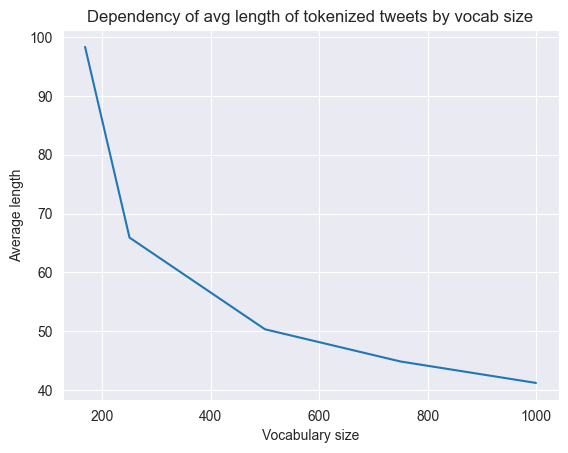

In [9]:
analyze_tokenization(tweets, vocab_sizes)

**Conclusion on Task 2.2:**

Based on the plot above, the following conclusions can be drawn:

- As the `vocab_size` increases from $150$ to $750$, there is a significant decrease in the average length of the tokenized tweets.
- Beyond vocabulary size of $750$, the decrease in the average length becomes less pronounced and starts to decrease slightly.

Based on these observations, a `vocab_size` of $750$ seems to be preferable as it strikes a balance between reducing average tokenized tweet length and avoiding excessive vocabulary size (that could cause loss in performance).

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

Data with italian speech sentences [link](https://huggingface.co/datasets/z-uo/male-LJSpeech-italian/tree/main) (I loaded validation data)

In [10]:
# Data extraction and loading
output = 'speech_italian.zip'
data_path = 'speech_italian'

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(data_path)
    
italian_df = pd.read_csv(data_path + '/val.csv', delimiter='|', 
                         header=0, names=[1, 2, 3])

# Get first 200 text sentences
italian_speech_data = italian_df[2].values[:200].tolist()
italian_speech_data[:2]

['essendo indisposto il primo magistrato di Corsenna.',
 'Si direbbe che il mio cervello riceva delle continue scosse.']

Length of the dataset: 200
Base vocab size: 86


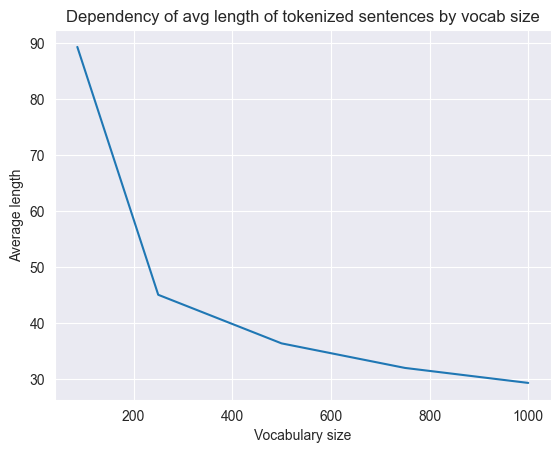

In [11]:
analyze_tokenization(italian_speech_data, 
                     vocab_sizes=[250, 500, 750, 1000], 
                     opt='sentences')

**Conclusion on Task 2.3:**

When analyzing another language (for example, Italian) text sentences, we have observed a similar pattern as that of the English tweets: here the average sentence length first begins to fall and then after $500$-$750$ `vocab size` decreases slightly indicating the prefferable vocabulary size options. However, the average length of the tokenized sentences is lower (by approx. $10$) that in tweets. This difference can be explained by the presence of URLs and user references in tweets, which tend to be longer. Additionally, the Italian sentences dataset has a smaller base vocabulary size compared to the base vocabulary size of English tweets that can be due to smileys and hashtags actively used in the tweets but in ordinary speech they are not used.